In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Exploring coffee imports and exports

## Import data 

In [2]:
# Import and Export data (all) - Final
all_imp_exp = pd.read_csv('./cleaned_data/final_all_import_export_data.csv') 

In [3]:
# Import and Export data (coffee) - Final
coffee_imp_exp = pd.read_csv('./cleaned_data/final_only_coffee_import_export_data.csv') 

In [4]:
# Import population Data
pop = pd.read_csv('./cleaned_data/final_world_population.csv')

In [5]:
## Import population and import/export data
per_cap = pd.read_csv('./cleaned_data/final_pop_imp_exp.csv')

In [31]:
## Import harvest production yield data
harvest = pd.read_csv('./cleaned_data/final_yield_harvest_production.csv')

In [7]:
## Import reported data
reported = pd.read_csv('./cleaned_data/final_reported_country_imports_exports.csv')

## Clean data

### coffee import exports

In [8]:
coffee_imp_exp = coffee_imp_exp.drop(['Unnamed: 0'], axis= 1)

In [9]:
## Drop rows with Coffee Green+Roast (is aggregation of coffee, green and coffee, roasted)
all_imp_exp[all_imp_exp['item'].str.contains('Roast')]['item'].unique()

all_imp_exp = all_imp_exp[~all_imp_exp['item'].str.contains('Roast')]

### population

In [10]:
pop = pop.drop('Unnamed: 0',axis=1)
pop.head()

,area,year,population
0,Afghanistan,1961,9166760.0
1,Afghanistan,1962,9345870.0
2,Afghanistan,1963,9533950.0
3,Afghanistan,1964,9731360.0
4,Afghanistan,1965,9938410.0


### per capita

In [11]:
per_cap = per_cap.drop('Unnamed: 0',axis=1)
per_cap.head()

,area,item,year,export_value($1000USD),export_quantity(tonnes),import_value($1000USD),import_quantity(tonnes),population
0,Afghanistan,Cotton lint,1961,8320.0,11480.0,0.0,0.0,9166760.0
1,Afghanistan,Cottonseed,1961,227.0,3050.0,0.0,0.0,9166760.0
2,Afghanistan,"Fruit, fresh nes",1961,250.0,3000.0,0.0,0.0,9166760.0
3,Afghanistan,Grapes,1961,1856.0,12302.0,0.0,0.0,9166760.0
4,Afghanistan,"Hides, cattle, wet salted",1961,300.0,430.0,0.0,0.0,9166760.0


### Harvest

In [12]:
harvest = harvest.drop('Unnamed: 0',axis=1)
harvest.head()

,area,year,yield_ha/hg,production_tonnes,harvested_ha
0,Angola,1961,4817.0,168600.0,350000.0
1,Angola,1962,3700.0,185000.0,500000.0
2,Angola,1963,3366.0,168300.0,500000.0
3,Angola,1964,3964.0,198200.0,500000.0
4,Angola,1965,4100.0,205000.0,500000.0


### Reported

In [13]:
reported = reported.drop('Unnamed: 0',axis=1)
reported.head()

,year,reporter,partner,export_value,export_quantity,import_value,import_quantity
0,2009,Albania,Bulgaria,16.0,2.0,NaN,NaN
1,2004,Albania,France,2.0,0.0,NaN,NaN
2,2009,Albania,Italy,8.0,1.0,1051.0,365.0
3,2008,Albania,Montenegro,43.0,7.0,NaN,NaN
4,2006,Albania,Serbia,26.0,10.0,NaN,NaN


## Exports - Country overview

### Top green coffee exporters 

In [14]:
## Add one to each year entry
coffee_imp_exp['counter'] = 1

## Group coffee info into countries
coffee_exporters = coffee_imp_exp.groupby('area')
## Sort contries by highest exporter
sum_coffee = coffee_exporters.sum().sort_values(by=['export_value($1000USD)'], ascending=False)
#sum_coffee.drop('counter', axis=1, inplace=True)
sum_coffee.head()

,year,export_value($1000USD),export_quantity(tonnes),import_value($1000USD),import_quantity(tonnes),counter
area,,,,,,
Brazil,105311,106053825.0,56315613.0,230955.0,55572.0,53
Colombia,105311,67727967.0,28086056.0,616517.0,283879.0,53
Viet Nam,105311,24454329.0,17424449.0,103839.0,60128.0,53
Indonesia,105311,21842496.0,13705545.0,396048.0,238739.0,53
Guatemala,105311,19202717.0,8906694.0,1620.0,786.0,53


### Number of years countries have been exporting coffee

In [15]:
## Remove countries with no coffee exports
area_years = coffee_imp_exp[coffee_imp_exp['export_quantity(tonnes)']> 1][['area','counter','export_value($1000USD)','export_quantity(tonnes)']].groupby(['area']).sum().sort_values('export_quantity(tonnes)', ascending=False).reset_index()[['area','counter','export_value($1000USD)','export_quantity(tonnes)']]
area_years.head()

,area,counter,export_value($1000USD),export_quantity(tonnes)
0,Brazil,53,106053825.0,56315613.0
1,Colombia,53,67727967.0,28086056.0
2,Viet Nam,53,24454329.0,17424449.0
3,Indonesia,53,21842496.0,13705545.0
4,Ivory Coast,53,13598412.0,9527734.0



51 countries have been exporting coffee for at least 53 years
126 countries have been exporting coffee for less than 53 years


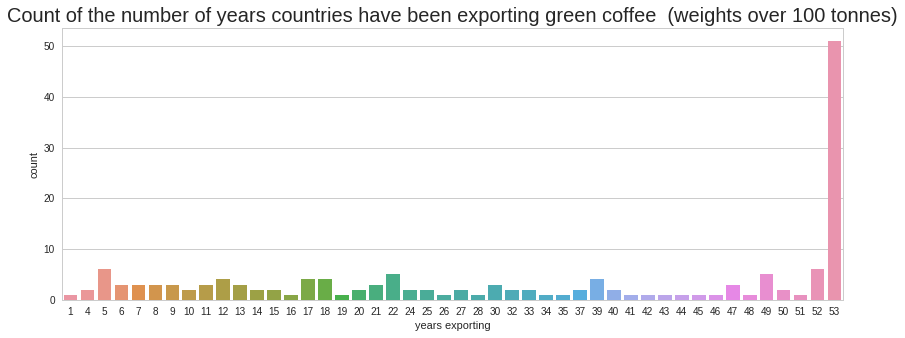

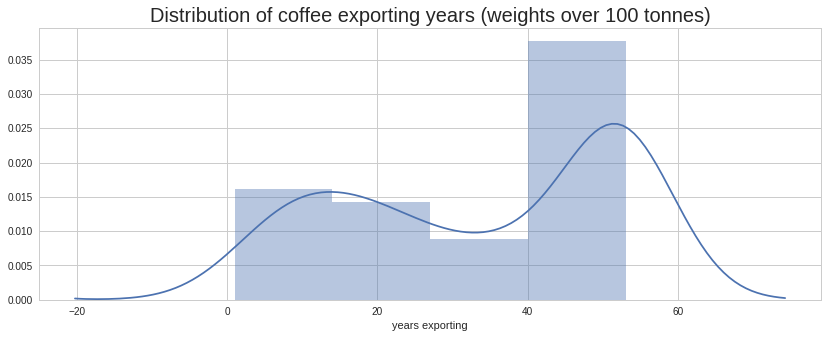

In [16]:
## Plot years exporting coffee 
fig = plt.subplots(figsize=(14,5))
sns.countplot(area_years[area_years['export_quantity(tonnes)']> 100]['counter']);
plt.xlabel('years exporting')
plt.title('Count of the number of years countries have been exporting green coffee  (weights over 100 tonnes)', fontsize = 20);

## Plot distribution of years exporting coffee
fig = plt.subplots(figsize=(14,5))
sns.distplot(area_years[area_years['export_quantity(tonnes)']> 100]['counter']);
plt.xlabel('years exporting')
plt.title('Distribution of coffee exporting years (weights over 100 tonnes)', fontsize = 20);

## Countries importing for 53 years
long_10 = area_years[area_years['counter']==53].sort_values('counter', ascending=False) 
## Countries importing less than 53 years
short_10 = area_years[area_years['counter']<53].sort_values('counter', ascending=False) 

print ('\n{} countries have been exporting coffee for at least 53 years'.format(long_10.shape[0]))
print ('{} countries have been exporting coffee for less than 53 years'.format(short_10.shape[0]))

### Total coffee exports

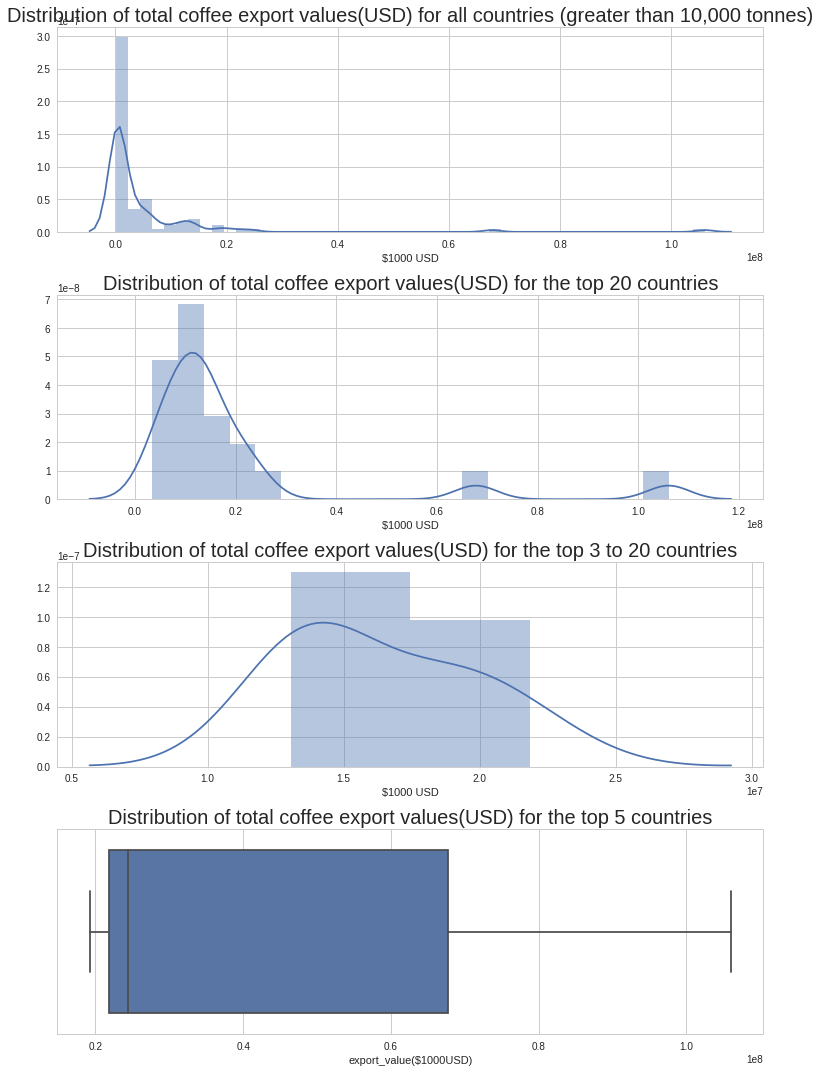

In [17]:
fig = plt.subplots(figsize=(12,15))
ax1=plt.subplot(411)
sns.distplot(area_years[area_years['export_quantity(tonnes)']> 10000]['export_value($1000USD)'], ax=ax1);
plt.xlabel('$1000 USD')
plt.title('Distribution of total coffee export values(USD) for all countries (greater than 10,000 tonnes)', fontsize = 20);

ax2=plt.subplot(412)
sns.distplot(area_years.iloc[:20]['export_value($1000USD)'], bins=20, ax=ax2);
plt.xlabel('$1000 USD')
plt.title('Distribution of total coffee export values(USD) for the top 20 countries', fontsize = 20);

ax3=plt.subplot(413)
sns.distplot(sum_coffee.iloc[3:10]['export_value($1000USD)'], ax=ax3)
plt.xlabel('$1000 USD');
plt.title('Distribution of total coffee export values(USD) for the top 3 to 20 countries', fontsize = 20);

ax4=plt.subplot(414)
sns.boxplot(sum_coffee.iloc[:5]['export_value($1000USD)'], ax=ax4)
plt.title('Distribution of total coffee export values(USD) for the top 5 countries', fontsize = 20);
plt.tight_layout()

### Overall export values and quantities of green coffee

Based on total sums of all coffee exports by country

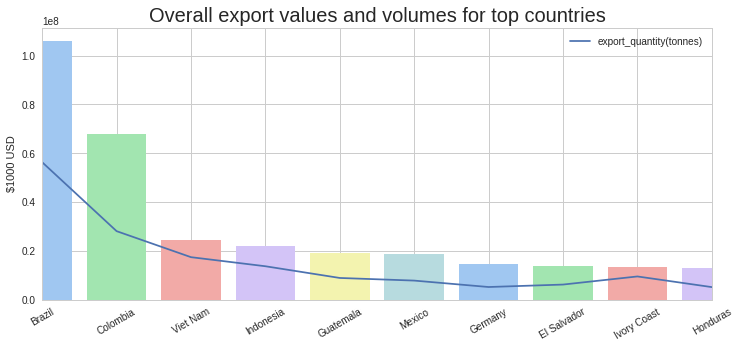

In [18]:
fig = plt.subplots(figsize=(12,5))
ax1 = plt.subplot(111)

sns.barplot(x=sum_coffee.iloc[:10].index, y='export_value($1000USD)', data=sum_coffee.iloc[:10], palette='pastel',ax=ax1)
sum_coffee[['export_quantity(tonnes)']].iloc[:10].plot(ax=ax1)

plt.title('Overall export values and volumes for top countries', fontsize=20)
plt.ylabel('$1000 USD')
plt.xlabel(' ')
plt.xticks(rotation=30);

### Top highest average exporting countries by gross value

Based on mean average of all coffee exports by country 

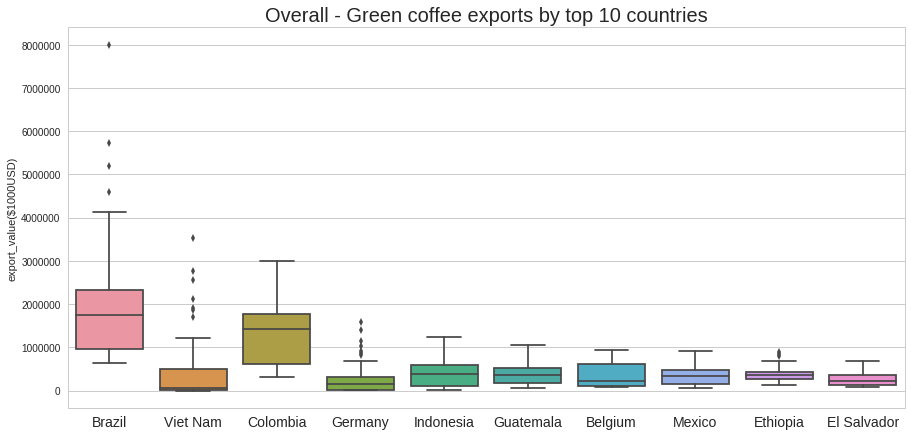

In [19]:
## Top coffee exporters
top_exporters = coffee_imp_exp.groupby('area').mean().reset_index().sort_values('export_value($1000USD)', ascending=False)['area'].iloc[:10].values
## Filter countries from coffee_imp_exp
top_exporters = coffee_imp_exp[(coffee_imp_exp['area']=='Brazil') |
                (coffee_imp_exp['area']=='Colombia') | 
                 (coffee_imp_exp['area']=='Indonesia') | 
                  (coffee_imp_exp['area']=='Guatemala') | 
                   (coffee_imp_exp['area']=='Ethiopia') | 
                    (coffee_imp_exp['area']=='Mexico') |
                     (coffee_imp_exp['area']=='Germany') | 
                      (coffee_imp_exp['area']=='Belgium') | 
                       (coffee_imp_exp['area']=='El Salvador') | 
                        (coffee_imp_exp['area']=='Viet Nam')]

top_exporters = top_exporters.sort_values('export_value($1000USD)', ascending = False)

fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(x='area', y="export_value($1000USD)", data=top_exporters) 
plt.title('Overall - Green coffee exports by top 10 countries', fontsize=20)
plt.xlabel(' ')
plt.xticks(fontsize=14);

### Price received by countries per kilogram (Overall)

#### Price per kilogram for all countries

Price based on mean average of all coffee exports by country

In [20]:
## Calculate price per kg
coffee_imp_exp['$1000/tonne_export'] = coffee_imp_exp['export_value($1000USD)'] / coffee_imp_exp['export_quantity(tonnes)']

Median price: $2.40 USD
45 Countries are in the top 25th quartile
45 Countries are in the bottom 25th quartile
89 Countries are between the 25th and 75th quartile


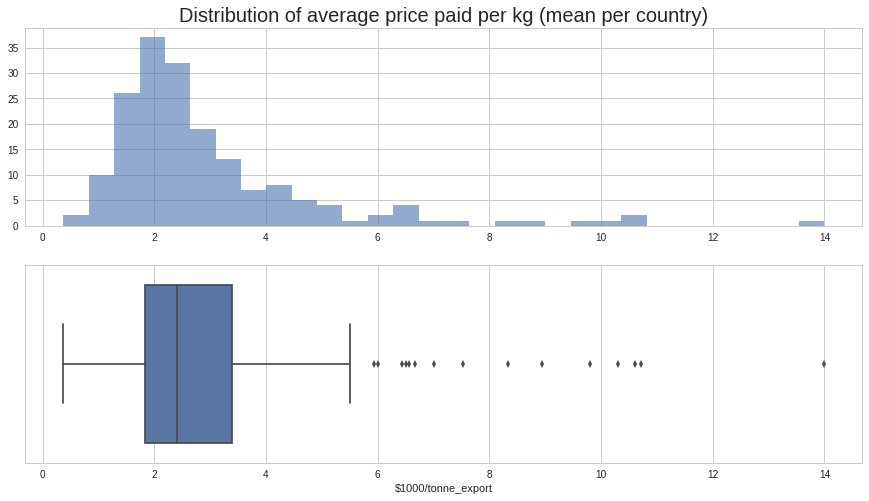

In [21]:
## Mean price per kg for total exports
avg_price = coffee_imp_exp.groupby('area').mean().sort_values('$1000/tonne_export', ascending=False)
avg_price = avg_price[avg_price['$1000/tonne_export']>0]

fig = plt.subplots(figsize=(15,8))
plt.subplot(211)
plt.hist(avg_price['$1000/tonne_export'], bins=30, alpha=0.6)
plt.title('Distribution of average price paid per kg (mean per country)',fontsize=20);

plt.subplot(212)
sns.boxplot(avg_price['$1000/tonne_export']);

quart_0 = avg_price['$1000/tonne_export'].quantile(0)
quart_25 = avg_price['$1000/tonne_export'].quantile(.25)
quart_50 = avg_price['$1000/tonne_export'].quantile(.50)
quart_75 = avg_price['$1000/tonne_export'].quantile(.75)
quart_100 = avg_price['$1000/tonne_export'].quantile(1)
print ('Median price: ${:.2f} USD'.format(quart_50))

print ('{} Countries are in the top 25th quartile'.format(avg_price[avg_price['$1000/tonne_export']>quart_75].shape[0]))
print ('{} Countries are in the bottom 25th quartile'.format(avg_price[avg_price['$1000/tonne_export']<quart_25].shape[0]))
print ('{} Countries are between the 25th and 75th quartile'.format(avg_price[(avg_price['$1000/tonne_export']>=quart_25) & (avg_price['$1000/tonne_export']<=quart_75)].shape[0]))

#### Countries with highest average price (USD) received per kilogram of green coffee

Average calculated on export value divided by exported tonnes of all coffee exports by country

In [22]:
## Calculate Price per kg - based on total sum of exports
sum_coffee['$1000/tonne_export'] = sum_coffee['export_value($1000USD)'] / sum_coffee['export_quantity(tonnes)']

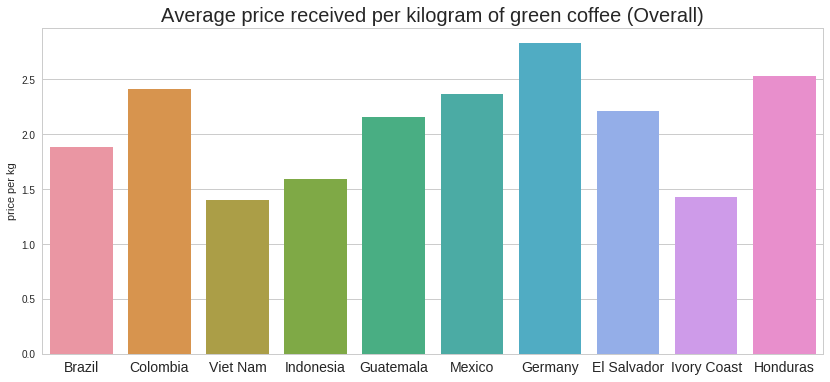

In [23]:
fig = plt.subplots(figsize=(14,6))
sns.barplot(x = sum_coffee.iloc[:10].index, y = '$1000/tonne_export', data=sum_coffee.iloc[:10])

plt.ylabel('price per kg');
plt.xlabel(' ')
plt.title('Average price received per kilogram of green coffee (Overall)', fontsize=20)
plt.xticks(fontsize=14);

#### Highest and lowest prices paid to countries on average
Low volume exporters but receive a high price

Prices compared with the export volume

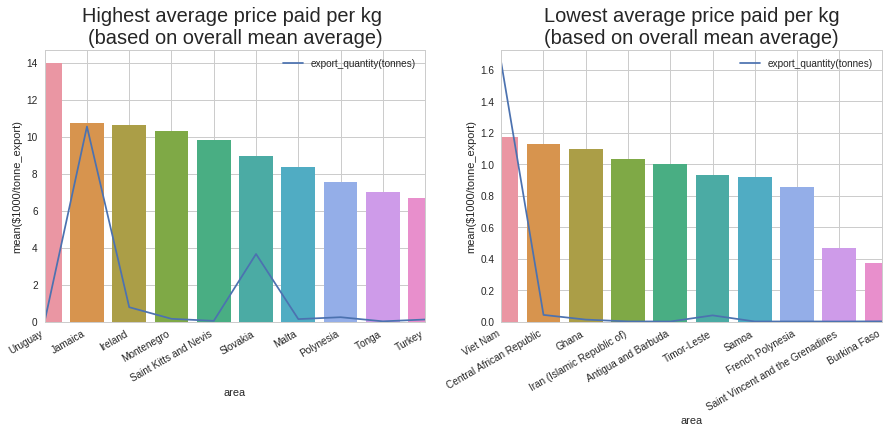

In [24]:
fig = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
sns.barplot(ax=ax1, x=avg_price[avg_price['$1000/tonne_export']>quart_75][:10].index, y='$1000/tonne_export', data=avg_price[avg_price['$1000/tonne_export']>quart_75][:10])

avg_price[['export_quantity(tonnes)']].apply(lambda x : x /100).iloc[:10].plot(ax=ax1)

plt.xticks(rotation=30, ha='right', va='top')
plt.title('Highest average price paid per kg \n(based on overall mean average)', fontsize=20);

ax2 = plt.subplot(122)
sns.barplot(ax=ax2, x=avg_price[avg_price['$1000/tonne_export']<quart_25][-10:].index, y='$1000/tonne_export', data=avg_price[avg_price['$1000/tonne_export']<quart_25][-10:])

avg_price[['export_quantity(tonnes)']].apply(lambda x : x /200000).iloc[-10:].plot(ax=ax2)

plt.xticks(rotation=30, ha='right', va='top')
plt.title('Lowest average price paid per kg\n(based on overall mean average)', fontsize=20);

### Where coffee is in relation to country's exports

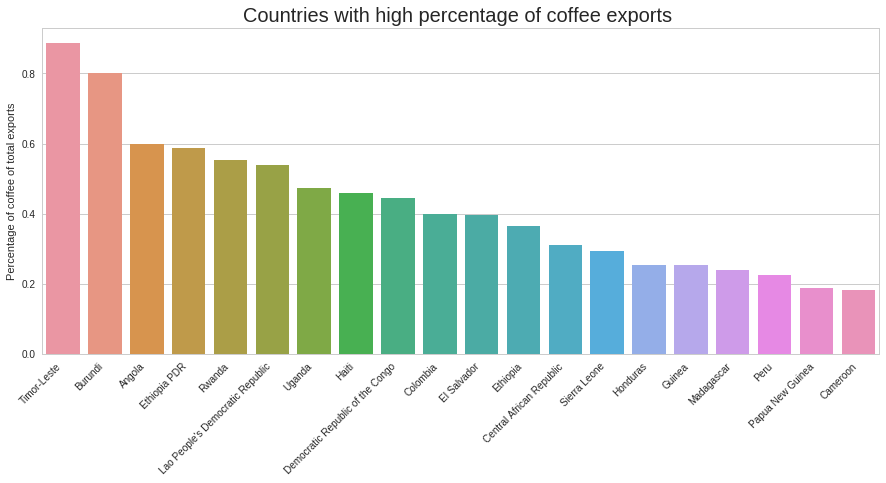

In [25]:
## Overall coffee export percentange by country
df1 = all_imp_exp.groupby('area').sum()[['export_value($1000USD)']].rename(columns={'export_value($1000USD)':'total_exports'})
                                                                                    
df2 = coffee_imp_exp.groupby('area').sum()[['export_value($1000USD)']].rename(columns={'export_value($1000USD)':'total_coffee'})
overall_exports = pd.concat([df1,df2], axis=1)
overall_exports['coffee_percent'] = overall_exports['total_coffee'] / overall_exports['total_exports']
overall_exports = overall_exports.dropna()
overall_exports = overall_exports.sort_values('coffee_percent', ascending=False)

## Plot total of countries with highest percentage of coffee exports
###########################################################################################################
fig = plt.subplots(figsize=(15,6))
sns.barplot(x=overall_exports[:20].index , y=overall_exports['coffee_percent'][:20])
plt.ylabel('Percentage of coffee of total exports')
plt.title('Countries with high percentage of coffee exports ', fontsize=20)
plt.xticks(rotation=45,ha='right', va='top');

### All countries' coffee exports over the years (value and quantity)

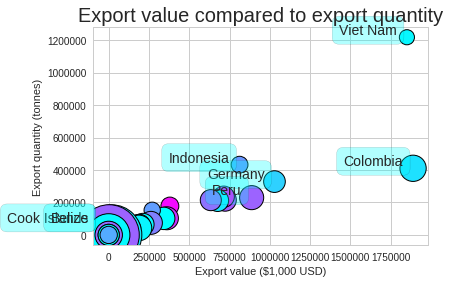

In [26]:
def exports_by_year(year):
    ## Plot all countries 
    df = coffee_imp_exp.dropna(how='any')
    df = df.sort_values('export_value($1000USD)', ascending=False)
    
    countries = df[df['year']==year]['area'].values
    x = df[df['year']==year]['export_value($1000USD)']
    y = df[df['year']==year]['export_quantity(tonnes)']
    s = df[df['year']==year][['$1000/tonne_export']]*150

    n = countries.shape[0]
    theta = 2 * np.pi * np.random.rand(n)
    colors = theta

    plt.scatter(x=x, y=y,s=s, c=colors, cmap=plt.cm.cool, linewidths=1, edgecolors='k' );
    plt.xlabel('Export value ($1,000 USD)')
    plt.ylabel('Export quantity (tonnes)')
    plt.title('Export value compared to export quantity', fontsize=20)
    for i, label in enumerate(countries):
        if i < 5:
            plt.annotate(label, xy=(x.values[i],y.values[i]),
                         xytext=(-10, 0), textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
                        fontsize=14)
        elif i > len(countries) - 3:
            plt.annotate(label, xy=(x.values[i],y.values[i]),
                         xytext=(-20, 10), textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
                        fontsize=14)

exports_by_year(2010)

### Plotly test

### All countries coffee harvests

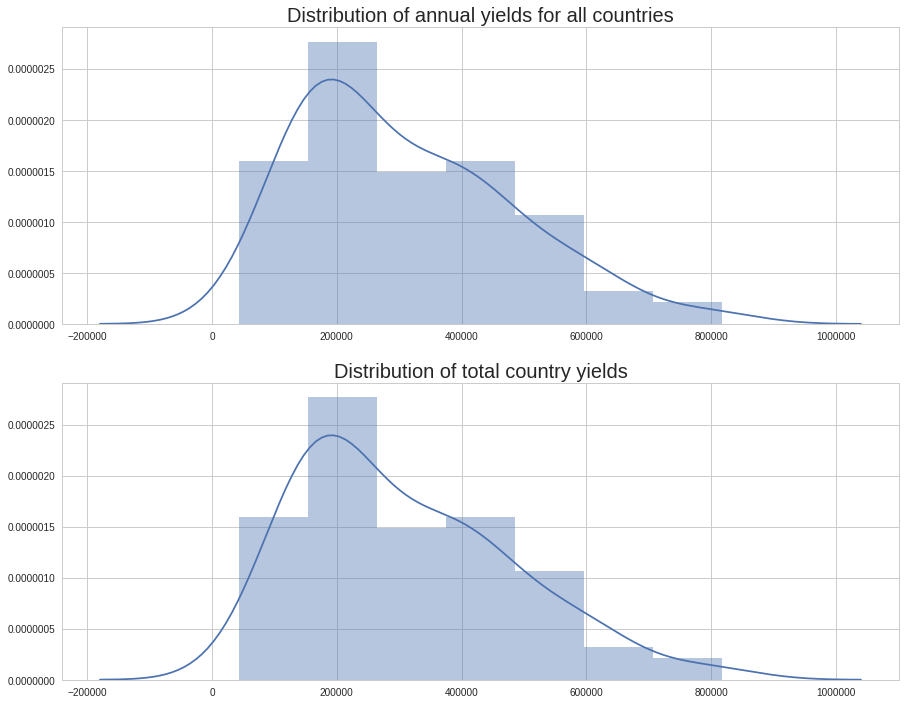

In [32]:
## Group by country
harvest_group = harvest.groupby('area').sum() 

fig, ax = plt.subplots(figsize=(15,12))
plt.subplot(211)
sns.distplot(harvest_group[['yield_ha/hg']])
plt.title('Distribution of annual yields for all countries',fontsize=20);
plt.subplot(212)
sns.distplot(harvest_group[['yield_ha/hg']])
plt.title('Distribution of total country yields', fontsize=20)
plt.tight_layout;

#### Top production, harvest and yielding countries

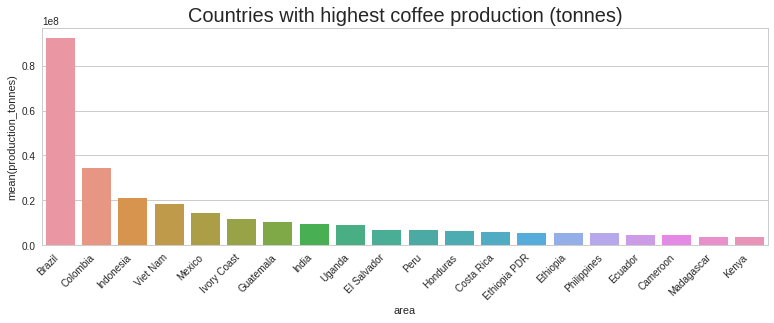

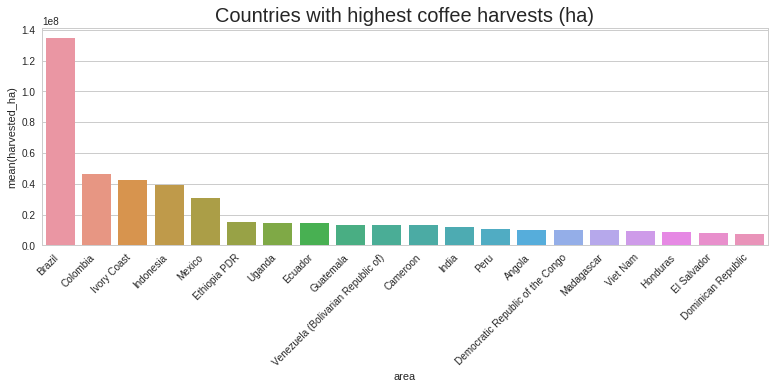

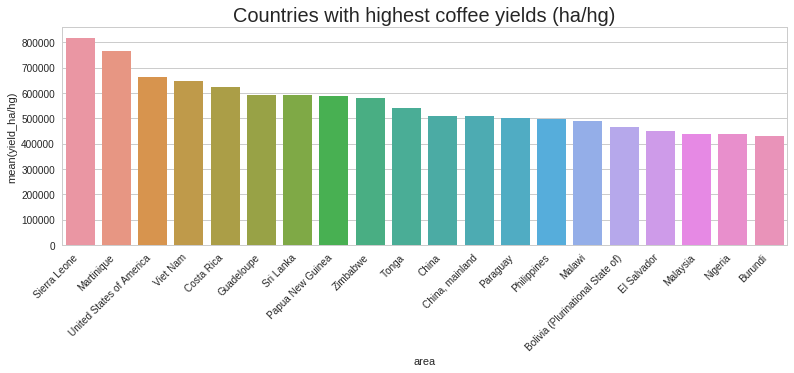

In [33]:
## Production
data = harvest_group.sort_values('production_tonnes', ascending=False)

fig, ax = plt.subplots(figsize=(13,4))
sns.barplot(x=data.iloc[:20].index, y='production_tonnes', data=data.iloc[:20])
plt.xticks(rotation=45, ha='right',va='top')
plt.title('Countries with highest coffee production (tonnes)', fontsize=20);

## Harvest 
data = harvest_group.sort_values('harvested_ha', ascending=False)

fig, ax = plt.subplots(figsize=(13,4))
sns.barplot(x=data.iloc[:20].index, y='harvested_ha', data=data.iloc[:20])
plt.xticks(rotation=45, ha='right',va='top')
plt.title('Countries with highest coffee harvests (ha)', fontsize=20);

## Yields
data = harvest_group.sort_values('yield_ha/hg', ascending=False)

fig, ax = plt.subplots(figsize=(13,4))
sns.barplot(x=data.iloc[:20].index, y='yield_ha/hg', data=data.iloc[:20])
plt.xticks(rotation=45, ha='right',va='top')
plt.title('Countries with highest coffee yields (ha/hg)', fontsize=20);

## Imports - Country overview

### Highest mean coffee importing countries per capita¶

In [34]:
per_cap['imp_per_cap'] = per_cap['import_quantity(tonnes)'] / per_cap['population']
coffee_per_cap = per_cap[per_cap['item']=='Coffee, green']

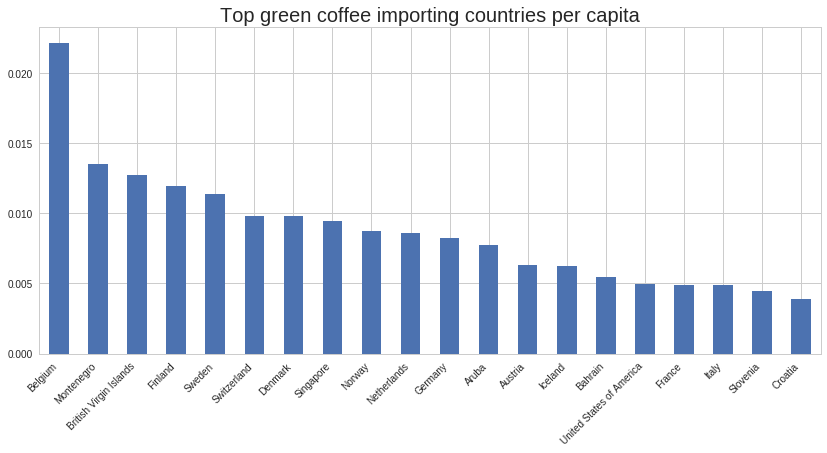

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
per_cap_group = coffee_per_cap.groupby('area').mean()  
per_cap_group = per_cap_group.sort_values('imp_per_cap',ascending=False)
per_cap_group[['imp_per_cap']].iloc[:20].plot(ax=ax, legend=0, kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top green coffee importing countries per capita', fontsize=20)
plt.xlabel(' ');

### Highest gross coffee importing counries

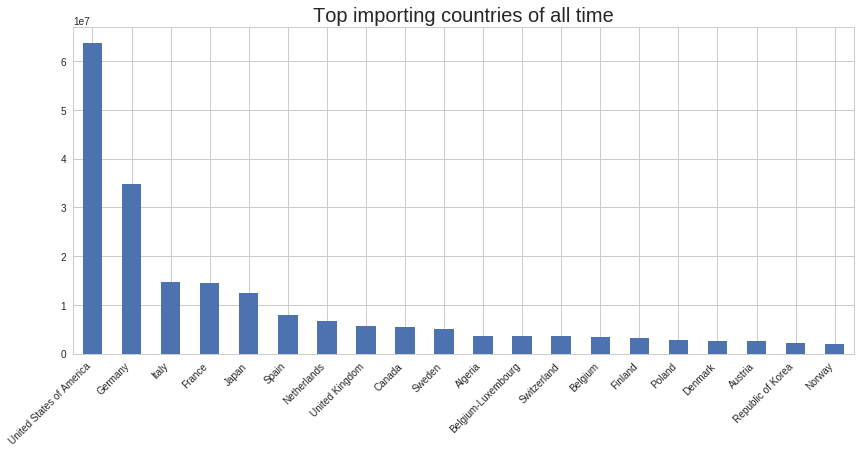

In [36]:
fig, ax = plt.subplots(figsize=(14,6))
per_cap_group = coffee_per_cap.groupby('area').sum() 
per_cap_group = per_cap_group.sort_values('import_quantity(tonnes)',ascending=False)
per_cap_group[['import_quantity(tonnes)']].iloc[:20].plot(ax=ax, legend=0, kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top importing countries of all time', fontsize=20)
plt.xlabel(' ');

### Import quantities in relation to population

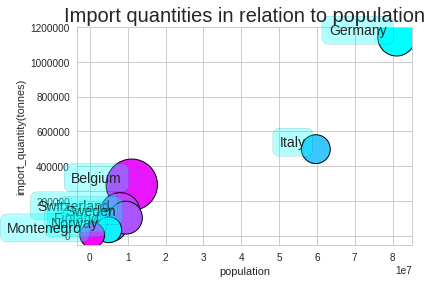

In [37]:
def per_cap_imports(year):
    ## Plot all countries 
    df = coffee_per_cap.dropna(how='any')
    df = df.sort_values('imp_per_cap',ascending=False)
    df = df[df['imp_per_cap']>.006]
    countries = df[df['year']==year]['area'].values
    x = df[df['year']==year]['population']
    y = df[df['year']==year]['import_quantity(tonnes)']
    s = df[df['year']==year][['imp_per_cap']]*100000

    n = countries.shape[0]
    theta = 2 * np.pi * np.random.rand(n)
    colors = theta

    plt.scatter(x=x, y=y,s=s, c=colors, cmap=plt.cm.cool, linewidths=1, edgecolors='k' );
    plt.xlabel('population')
    plt.ylabel('import_quantity(tonnes)')
    plt.title('Import quantities in relation to population', fontsize=20)
    for i, label in enumerate(countries):
        if i < 10:
            plt.annotate(label, xy=(x.values[i],y.values[i]),
                         xytext=(-10, 0), textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
                        fontsize=14)
        elif i > len(countries) - 3:
            plt.annotate(label, xy=(x.values[i],y.values[i]),
                         xytext=(-20, 10), textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
                        fontsize=14)

per_cap_imports(2012)

## Individual country stats - Dashboard

### TEST - View one countries per capita imports

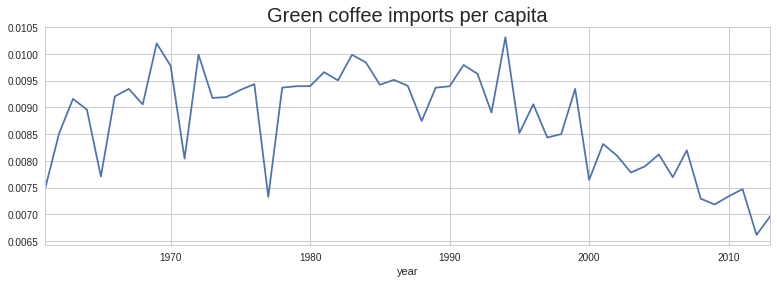

In [38]:
fig, ax = plt.subplots(figsize=(13,4))
cont_per_cap = coffee_per_cap[(coffee_per_cap['area']=='Norway') & (coffee_per_cap['item']=='Coffee, green')]
cont_per_cap[['year','imp_per_cap']].set_index('year').plot(legend=0, ax=ax)
plt.title('Green coffee imports per capita', fontsize=20);


### Imports, exports, price per kg

In [39]:
import matplotlib.gridspec as gs

def country_stats(country):
    
    coffee_by_year = coffee_imp_exp[coffee_imp_exp['area'] ==country].groupby('year').sum()

    ## Plot Values
    fig = plt.subplots(figsize=(20,5))
    plt.suptitle(country, fontsize=24)
    gs1 = gs.GridSpec(1, 2)
    ##############################################################################################
    #ax1 = plt.subplot(5,1,1)
    #ax1 = plt.subplot2grid((5,2),(0,0))
    ax1 = plt.subplot(gs1[0, 0])
    coffee_by_year[['export_value($1000USD)']].plot(ax=ax1, legend=False)
    plt.xlabel('years')
    plt.title('Value of exported green coffee')
    
    plt.xticks(fontsize=14)
    ##############################################################################################
    #ax1 = plt.subplot(5,1,1)
    #ax2 = plt.subplot2grid((5,2),(0,1))
    ax2 = plt.subplot(gs1[0,1], sharey=ax1)
    coffee_by_year[['import_value($1000USD)']].plot(ax=ax2, legend=False)
    plt.xlabel('years')
    plt.title('Value of imported green coffee')
    plt.xticks(fontsize=14)
    
    ## Plot Quantities
    fig2 = plt.subplots(figsize=(20,5))
    gs2 = gs.GridSpec(1, 2)
    ##############################################################################################
    #ax1 = plt.subplot(5,1,3)
    ax1 = plt.subplot(gs2[0, 0])
    coffee_by_year[['export_quantity(tonnes)']].plot(ax=ax1)
    plt.xlabel('years')
    plt.title('Quantity exported')
    plt.xticks(fontsize=14)
    ##############################################################################################
    #ax2 = plt.subplot(5,1,3)
    ax2 = plt.subplot(gs2[0, 1], sharey=ax1)
    coffee_by_year[['import_quantity(tonnes)']].plot(ax=ax2)
    plt.xlabel('years')
    plt.title('Quantity imported')
    plt.xticks(fontsize=14)
    
    ## Plot Price per kg
    fig3 = plt.subplots(figsize=(19,20))
    gs3 = gs.GridSpec(3, 2)
    ##############################################################################################
    #ax1 = plt.subplot(4,1,1)
    ax1 = plt.subplot(gs3[0:1,1])
    coffee_by_year[['$1000/tonne_export']].plot(ax=ax1)
    plt.xlabel('years')
    plt.title('Price paid to '+(country)+' for coffee (per kg)')
    plt.xticks(fontsize=14)

    ## Plot coffee percentage of total exports
    ##############################################################################################
    df = all_imp_exp[all_imp_exp['area']==country]
    
    #print df.groupby('year').sum().reset_index()
    df_cof =  df[df['item'] == 'Coffee, green'] [['year','export_value($1000USD)']]
    df_cof['year'] = df_cof['year'].astype(int)
    df_cof = df_cof.rename(columns={'year':'year','export_value($1000USD)':'coffee_exports'})  
    
    df_all = df[['year','export_value($1000USD)']].groupby('year').sum().reset_index()
    df_all['year'] = df_all['year'].astype(int)
    df_all = df_all.rename(columns={'year':'year','export_value($1000USD)':'all_exports'})
    total = pd.merge(df_cof, df_all)
    total = total.sort_values('year', ascending=False)
    total['percent'] = total['coffee_exports'] / total['all_exports']
    
    #ax2 = plt.subplot(4,1,2)
    ax2 = plt.subplot(gs3[1:2,0:2])
    total.set_index('year')[['percent']].plot(ax=ax2)
    plt.xlabel(' ')
    plt.title('Coffee - percentage of total exports', fontsize=20)
    plt.xticks(fontsize=14)
    
    ## Plot country's top imports 
    ##############################################################################################
    ## find all imports from country, group by items and get totals
    country_imp_exp = all_imp_exp[all_imp_exp['area']==country].groupby('item').sum().sort_values(by='export_value($1000USD)',ascending=False)
    ## Return export total value for coffee
    country_exp_coffee = country_imp_exp.loc['Coffee, green','export_value($1000USD)']
    ## Return import total value for coffee
    country_imp_coffee = country_imp_exp.loc['Coffee, green','import_value($1000USD)']    
    ##############################################################################################
    #ax3 = plt.subplot(4,1,3)
    ax3 = plt.subplot(gs3[0:1,0])
    #country_imp_exp[['export_value($1000USD)']].iloc[:20].plot(kind='bar',ax=ax4,legend=0);
    val = country_imp_exp[['export_value($1000USD)']].iloc[:20].values
    labels = country_imp_exp[['export_value($1000USD)']].iloc[:20].index
    pos = np.arange(20) #country_imp_exp[['export_value($1000USD)']].iloc[:20].index
    ax3.barh(pos, val, align='center')
    
    y_pos = np.arange(len(labels))
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(labels)
    plt.gca().invert_yaxis()
    ax3.yaxis.tick_right()
    
    if country_exp_coffee > country_imp_exp['export_value($1000USD)'].iloc[20]:
    
        x = int(country_imp_exp.iloc[0]['export_value($1000USD)'] )  #int(country_exp_coffee)
        y = country_imp_exp.index.get_loc('Coffee, green')
        
        plt.annotate(' ',xy=(country_exp_coffee,y), 
                     xytext=(x,y),
                     arrowprops=dict(facecolor='green', shrink=0.0),
                    fontsize=14);
        
    plt.xticks(rotation=35,ha='right', va='top', fontsize=14)
    plt.xlabel(' ')
    plt.title('Top total exports for '+str(country), fontsize=20)
    ##############################################################################################    


    ## Plot coffee imported per capita
    ##############################################################################################
    #ax6 = plt.subplot(4,1,4)
    ax4 = plt.subplot(gs3[-1 , 0:2])
    cont_per_cap = coffee_per_cap[(coffee_per_cap['area']==country) & (coffee_per_cap['item']=='Coffee, green')]
    cont_per_cap[['year','imp_per_cap']].set_index('year').plot(ax=ax4,legend=0)
    plt.title('Green coffee imports per capita', fontsize=20);
    
    ##############################################################################################
    print ('{}'.format(country))
    print ('-'*80)
    
    
    print ('Coffee exports: ${}'.format(int(country_exp_coffee)))
    print ('Coffee imports: ${}'.format(int(country_imp_coffee)))
    print ('Difference: ${}'.format(int(country_exp_coffee - country_imp_coffee)))
    print ('- '*40)
    print ('Total exports: ${}'.format(int(sum(country_imp_exp['export_value($1000USD)']))))
    print ('Coffee percentage of exports: {:.2f}%'.format(country_exp_coffee / sum(country_imp_exp['export_value($1000USD)'])))
    print ('-'*80)
    
    plt.tight_layout();
    

Australia
--------------------------------------------------------------------------------
Coffee exports: $86852
Coffee imports: $4187167
Difference: $-4100315
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Total exports: $1582602696
Coffee percentage of exports: 0.00%
--------------------------------------------------------------------------------


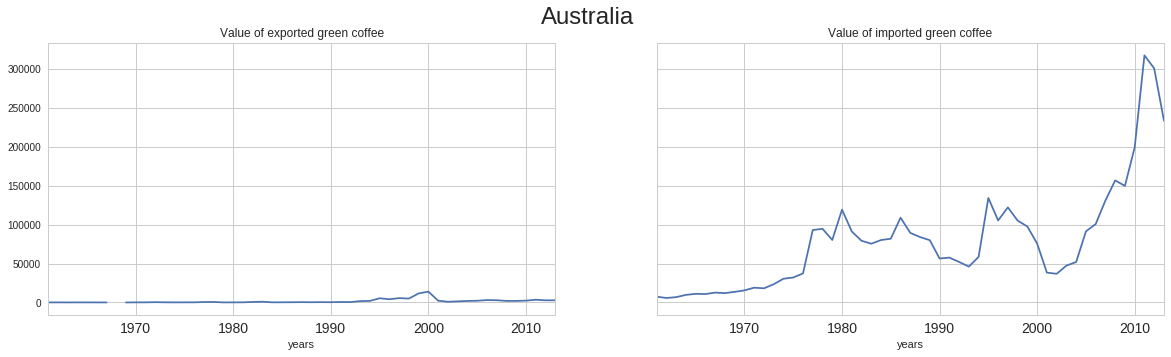

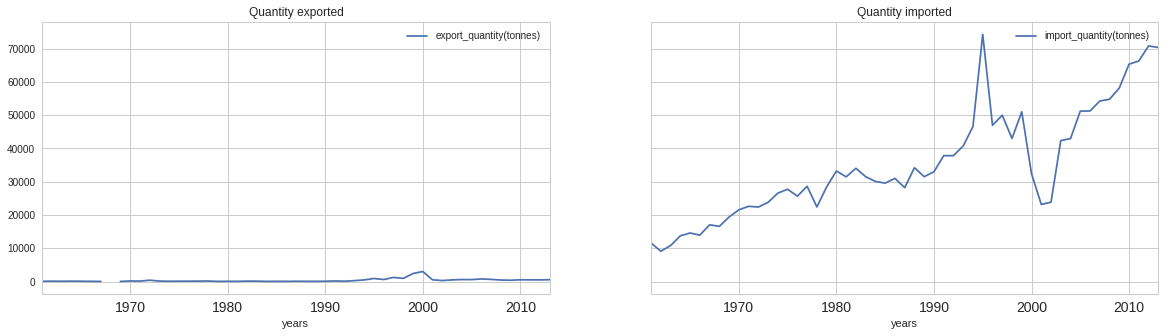

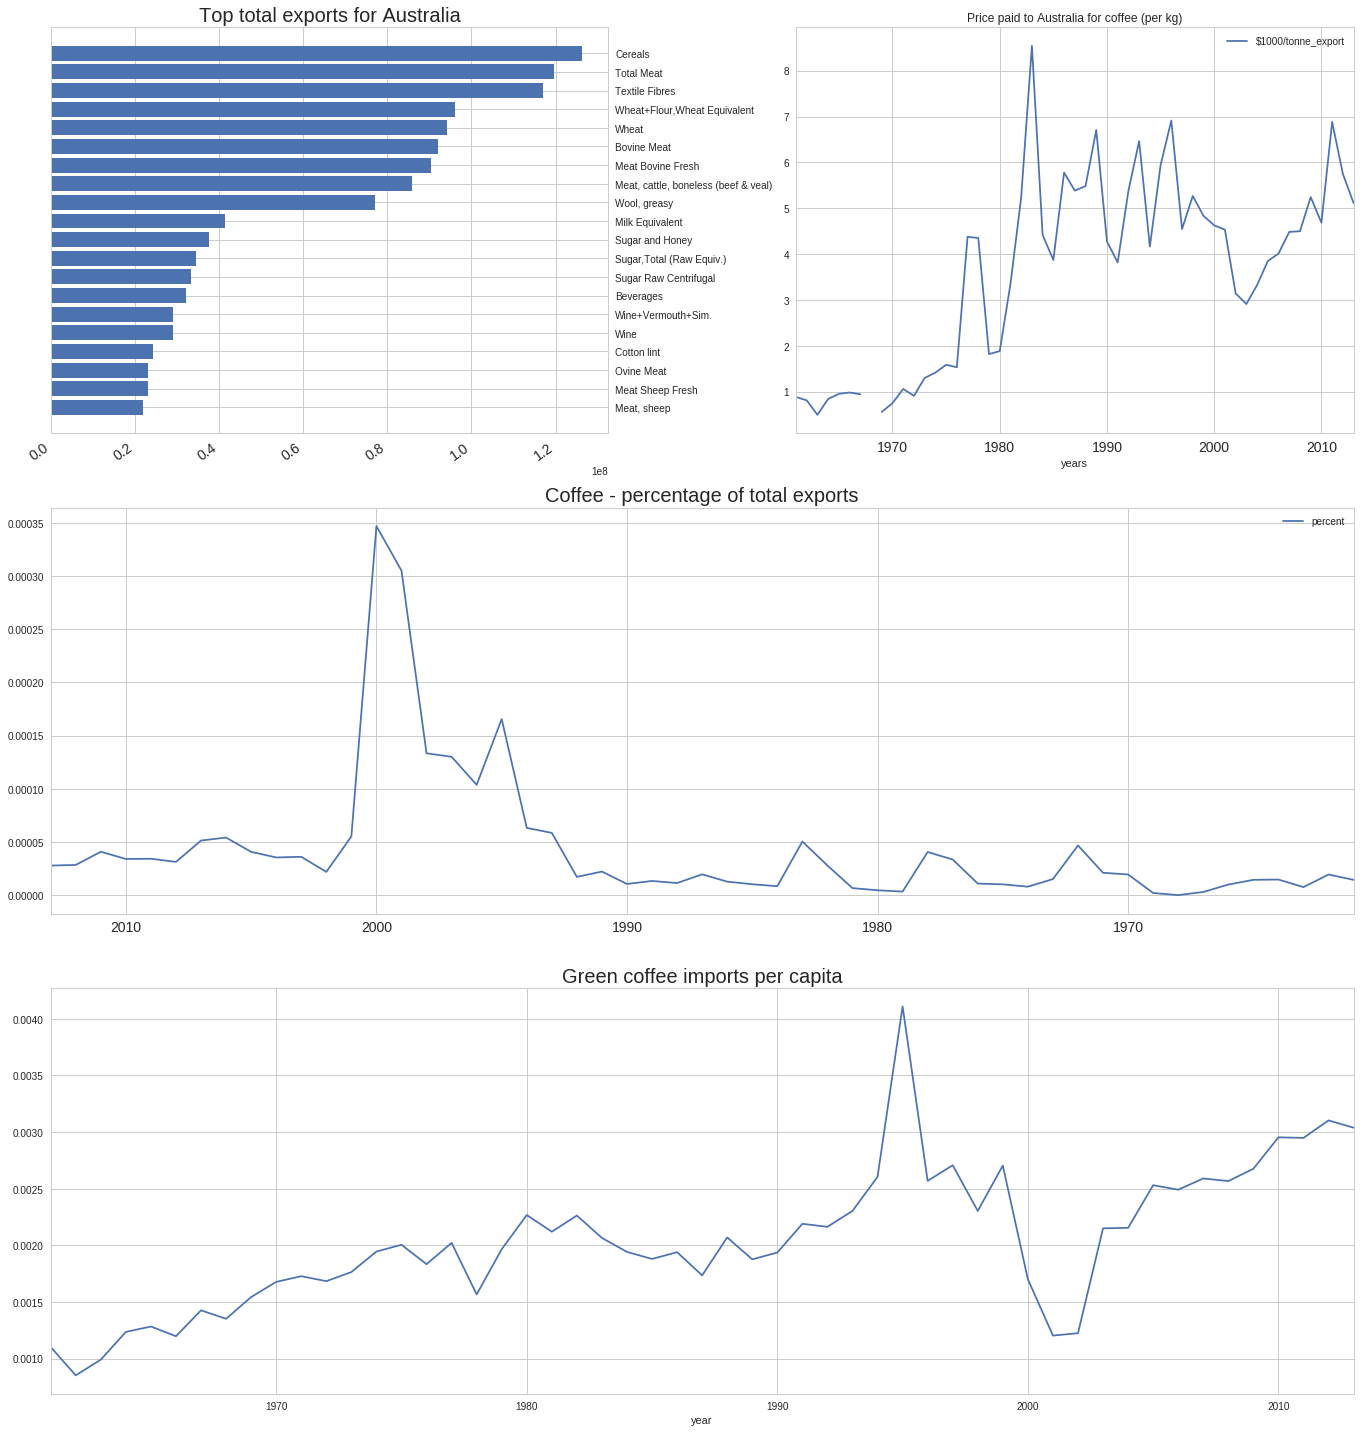

In [40]:
country_stats('Australia')

## Ideas